# ДЗ №1 по курсу "Прикладная теория графов"
## Ерманов Данат 154

## 1-2 пункты

In [54]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [135]:
def addLine(st1, st2, metro):
    for i in range(st1, st2):
        metro[i][i+1] = 1
        metro[i+1][i] = 1
        
def mergeStations(pairs, metro):
    a = []
    for i in pairs:
        metro[i[0]] = metro[i[0]] + metro[i[1]]
        #metro[i[1]] = 0
        metro[:,i[0]] = metro[:,i[0]] + metro[:,i[1]]
        #metro[:,i[1]] = 0
        metro[metro >= 1] = 1
        metro[i[0]][i[0]] = 0
        a.append(i[1])
    a.sort(reverse = True)
    for i in a:
        metro = np.delete(metro, i, 0)
        metro = np.delete(metro, i, 1)
    return metro

## Киевский метрополитен
62 станции в сжатом состоянии

https://upload.wikimedia.org/wikipedia/commons/c/cd/Kiev_metro_route_map_ru.svg?uselang=ru

In [176]:
k = np.zeros((68, 68))
addLine(0, 21, k)  #18
addLine(18, 35, k) #18
addLine(36, 53, k) #18
addLine(54, 67, k) #14

pairs = [[10, 25], [ 9, 40], [ 7, 58],
         [22, 61], [26, 41], 
         [38, 60]]
k = mergeStations(pairs, k)

K = nx.Graph(k)
e = []
for i in range(18):
    e.append('red')
for i in range(17):
    e.append('deepskyblue')
for i in range(16):
    e.append('limegreen')
for i in range(11):
    e.append('orange')


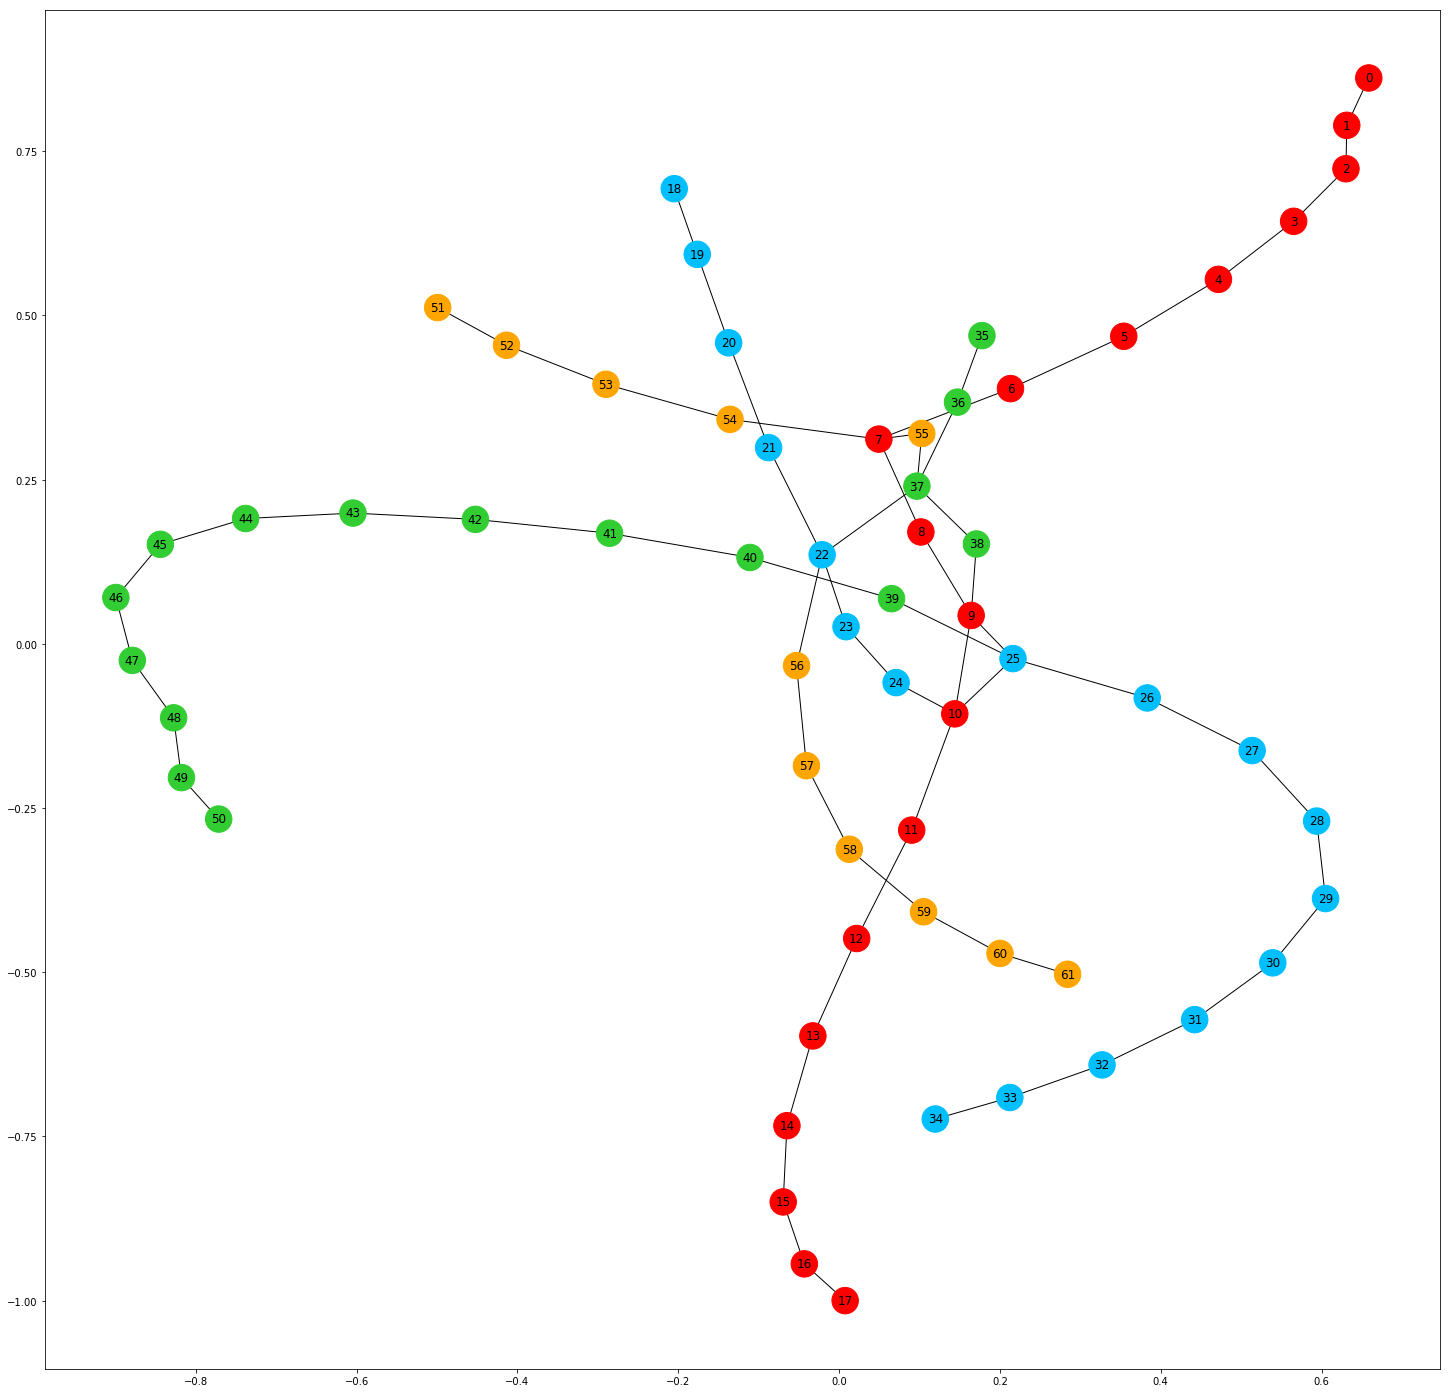

In [180]:
plt.figure(figsize=(25,25))
nx.draw_networkx(K, node_color = e, node_size=700)#, pos=None, arrows=True, with_labels=True) 
plt.show()

## Римский метрополитен
Сжат до размеров киевского метро. 74 -> 62
При выполнении данного сжатия, комментарий про рандомность вырезнных ребёр не был замечен. В силу наличия в метрополитене Киева всего одной компоненты связанности, идея с генерацией нескольких компонент связанностей не была рассмотрена.

https://upload.wikimedia.org/wikipedia/commons/3/35/Roma_-_mappa_metropolitana_%28schematica%29.png?uselang=ru

In [245]:
r = np.zeros((65, 65))
addLine(0, 16, r)  #17
addLine(17, 37, r) #21
addLine(38, 56, r) #19
addLine(57, 64, r) #8

pairs = [[16, 23],
         [26, 49], 
         [52, 57]]
r = mergeStations(pairs, r)
print(r.shape)
R = nx.Graph(r)
e = []
for i in range(17):
    e.append('limegreen')
for i in range(20):
    e.append('orange')
for i in range(18):
    e.append('deepskyblue')
for i in range(7):
    e.append('deepskyblue')

(62, 62)


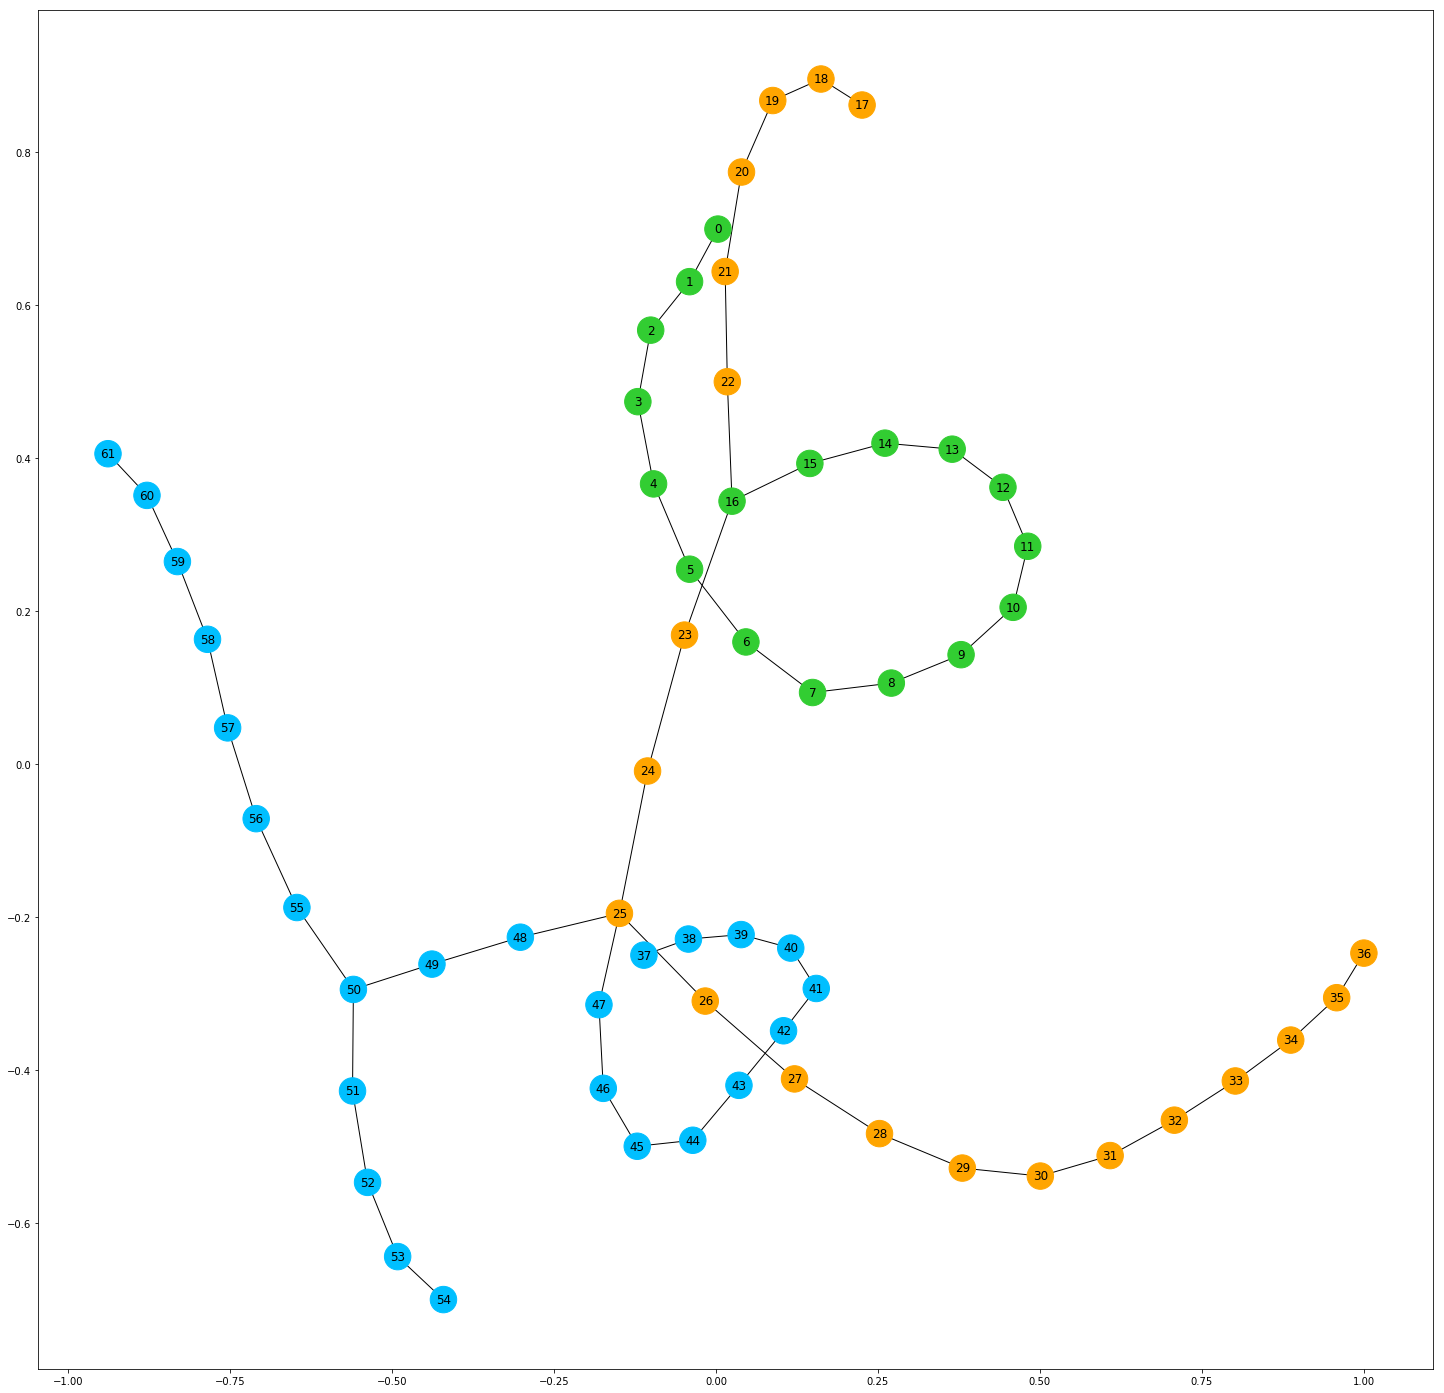

In [246]:
plt.figure(figsize=(25,25))
nx.draw_networkx(R, node_color = e, node_size=700)#, pos=None, arrows=True, with_labels=True) 
plt.show()

## Метрополитен Малаги
19 станций. 

https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D1%80%D0%BE%D0%BF%D0%BE%D0%BB%D0%B8%D1%82%D0%B5%D0%BD_%D0%9C%D0%B0%D0%BB%D0%B0%D0%B3%D0%B8#/media/File:Mapa_Geogr%C3%A1fico_Metro_de_M%C3%A1laga.png

In [209]:
m = np.zeros((20, 20))
addLine(0, 8, m)   #9
addLine(9, 19, m)  #11

pairs = [[2, 9]]

m = mergeStations(pairs, m)
M = nx.Graph(m)
e = []
for i in range(9):
    e.append('deepskyblue')
for i in range(10):
    e.append('brown')

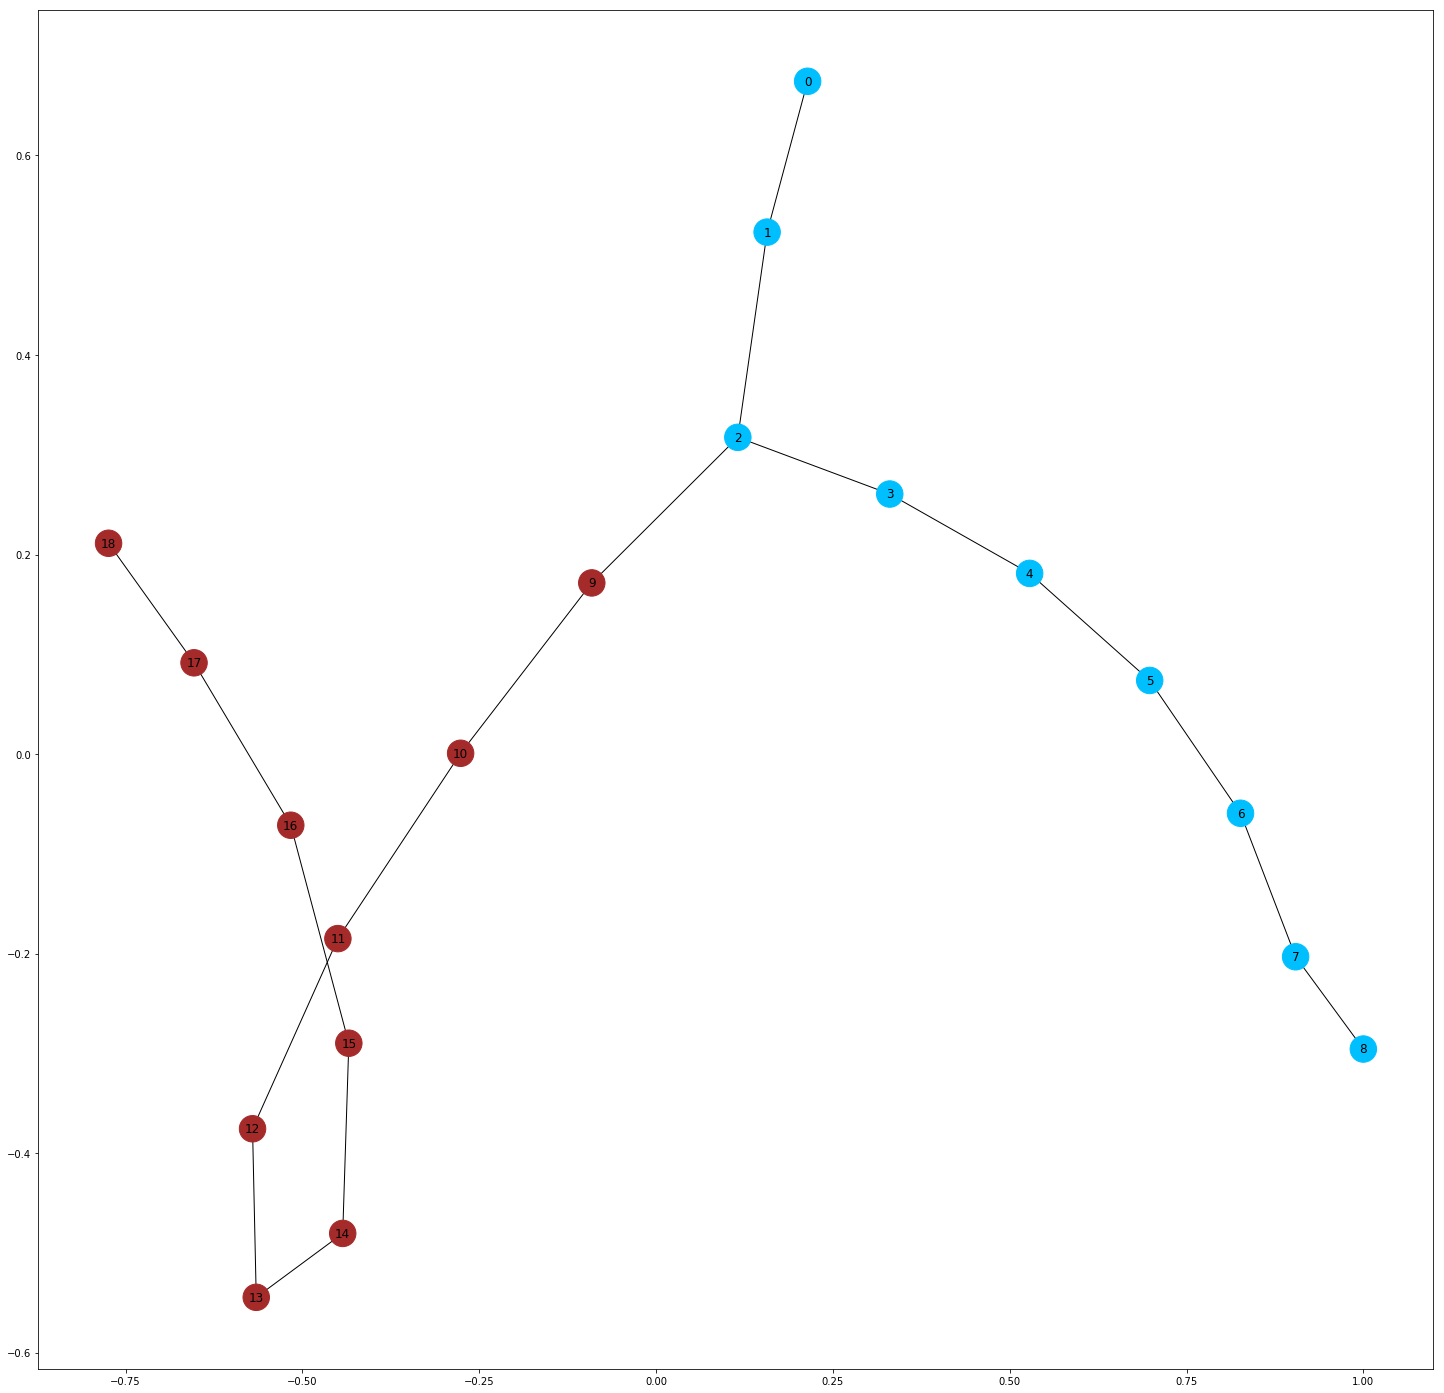

In [210]:
plt.figure(figsize=(25,25))
nx.draw_networkx(M, node_color = e, node_size=700)#, pos=None, arrows=True, with_labels=True) 
plt.show()

## 3.1

In [247]:
from networkx.algorithms import isomorphism
GM = isomorphism.GraphMatcher(R,K)
print(GM.is_isomorphic())

False


Графы Римского и Киевского метрополитенов не изоморфны

## 3.2

In [252]:
print(r.sum(), k.sum())

122.0 128.0


In [248]:
print(np.sort(r.sum(axis = 0)))
print(np.sort(k.sum(axis = 0)))
print(r.shape, k.shape)

[1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 4.]
[1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4.]
(62, 62) (62, 62)


In [257]:
cycles1 = nx.cycle_basis(R)
cycles2 = nx.cycle_basis(K)
print(cycles1)
print(cycles2)

[[8, 9, 38, 37, 55, 7], [10, 25, 9], [22, 23, 24, 10, 9, 38, 37]]

Рассмотренные обязательные условия не выполнены

## 4

In [232]:
GM = isomorphism.GraphMatcher(R,M)
print(GM.subgraph_is_isomorphic())
for subgraph in GM.subgraph_isomorphisms_iter():
    print(subgraph)
    p = subgraph

True
{4: 0, 5: 1, 6: 2, 12: 3, 11: 4, 10: 5, 9: 6, 8: 7, 7: 8, 13: 9, 14: 10, 15: 11, 16: 12, 17: 13, 18: 14, 19: 15, 20: 16, 21: 17, 22: 18}
{4: 0, 5: 1, 6: 2, 12: 3, 11: 4, 10: 5, 9: 6, 8: 7, 7: 8, 13: 9, 14: 10, 15: 11, 37: 12, 36: 13, 35: 14, 34: 15, 33: 16, 32: 17, 31: 18}
{4: 0, 5: 1, 6: 2, 12: 3, 11: 4, 10: 5, 9: 6, 8: 7, 7: 8, 13: 9, 14: 10, 15: 11, 38: 12, 39: 13, 40: 14, 41: 15, 42: 16, 43: 17, 44: 18}
{4: 0, 5: 1, 6: 2, 12: 3, 11: 4, 10: 5, 9: 6, 8: 7, 7: 8, 13: 9, 14: 10, 15: 11, 38: 12, 39: 13, 40: 14, 45: 15, 46: 16, 47: 17, 48: 18}
{11: 0, 12: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7, 0: 8, 13: 9, 14: 10, 15: 11, 16: 12, 17: 13, 18: 14, 19: 15, 20: 16, 21: 17, 22: 18}
{11: 0, 12: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7, 0: 8, 13: 9, 14: 10, 15: 11, 37: 12, 36: 13, 35: 14, 34: 15, 33: 16, 32: 17, 31: 18}
{11: 0, 12: 1, 6: 2, 5: 3, 4: 4, 3: 5, 2: 6, 1: 7, 0: 8, 13: 9, 14: 10, 15: 11, 38: 12, 39: 13, 40: 14, 41: 15, 42: 16, 43: 17, 44: 18}
{11: 0, 12: 1, 6: 2, 5: 3, 4: 4, 3: 5, 

У нас имеется множество подграфов. Возьмём любой из них.

In [230]:
e = ['red'] * 52
for i in p:
    e[i] = 'blue'

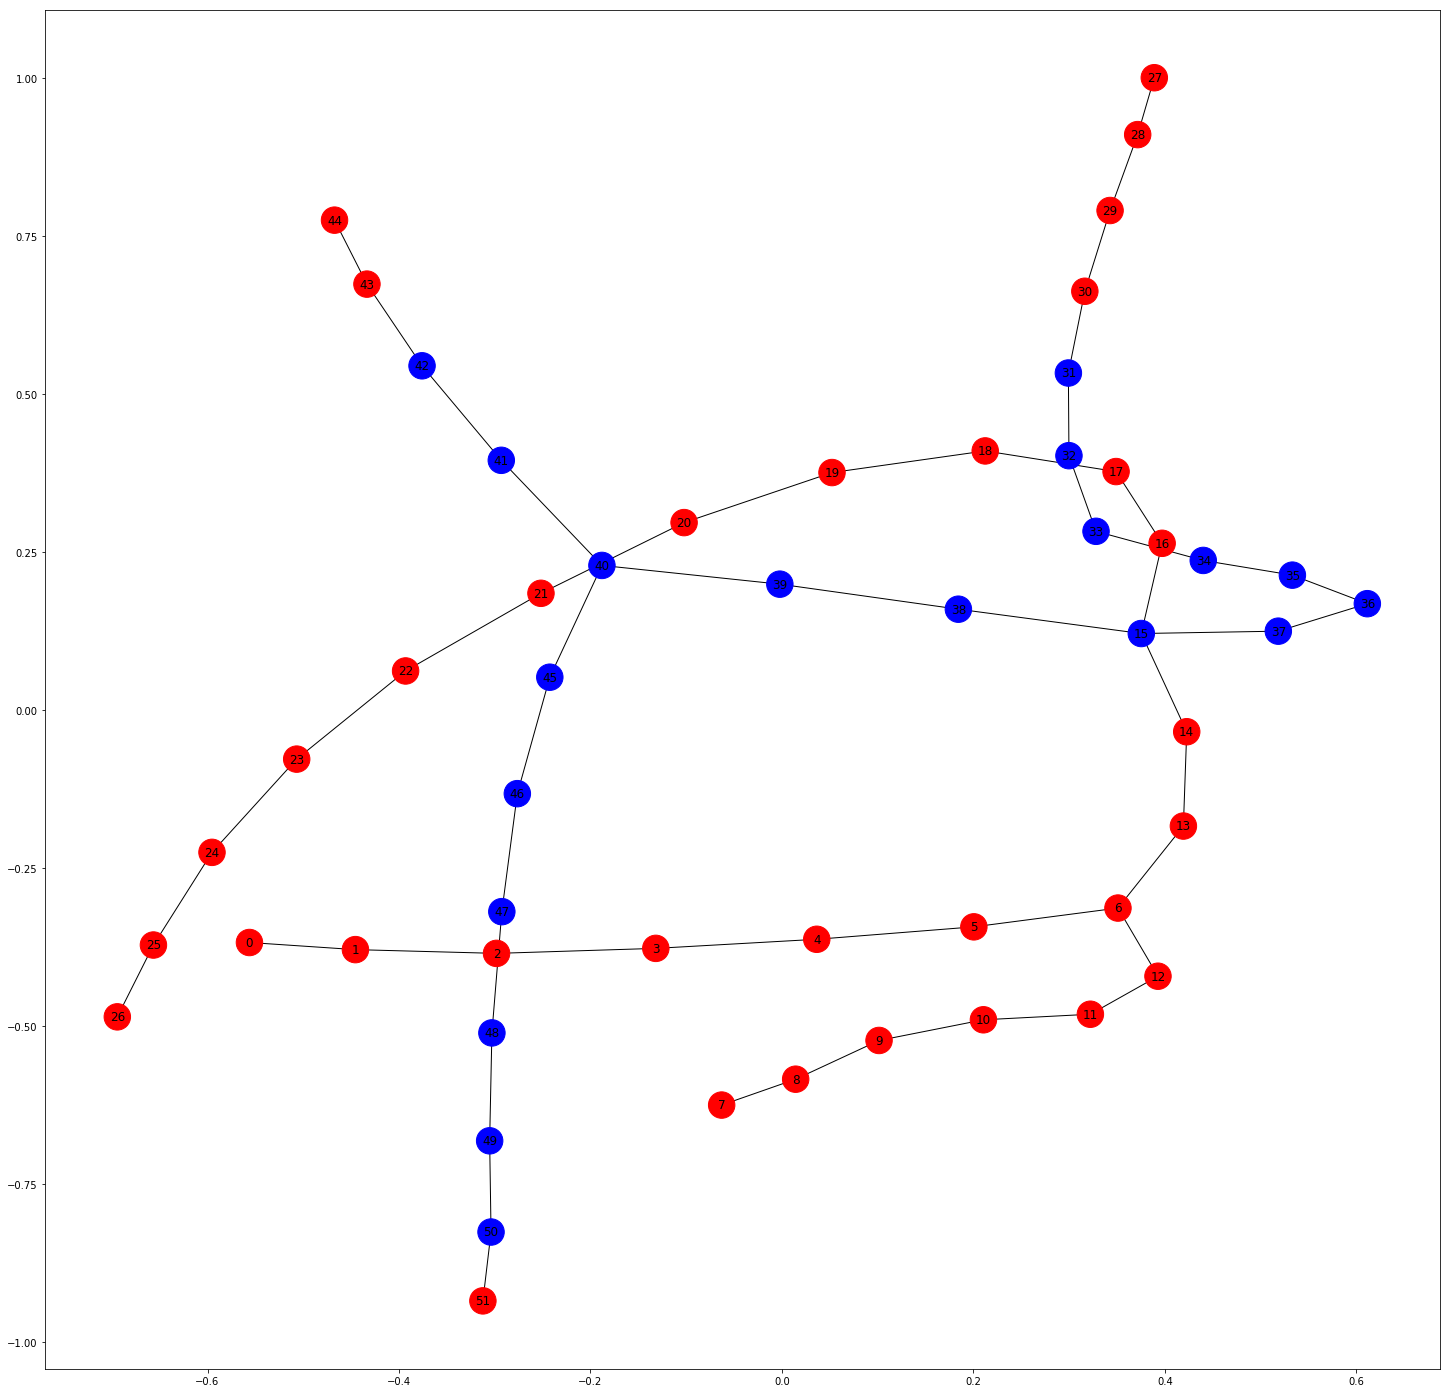

In [231]:
plt.figure(figsize=(25,25))
nx.draw_networkx(R, node_color = e, node_size=700)#, pos=None, arrows=True, with_labels=True) 
plt.show()